In [1]:
from adaline import *
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('../perceptron-train.csv',names=['target','col1','col2'])
test = pd.read_csv('../perceptron-test.csv',names=['target','col1','col2'])

In [3]:
train['col2'] = (train['col2'] - train['col2'].mean()) / train['col2'].std()

test['col2'] = (test['col2'] - test['col2'].mean()) / test['col2'].std()

In [4]:
test.head()

,target,col1,col2
0,-1.0,1.651437,1.220010
1,1.0,-0.866495,1.083781
2,-1.0,0.789828,-0.469184
3,-1.0,0.179549,1.799168
4,1.0,-0.434351,0.503610


In [5]:
x_train = train[['col1','col2']].to_numpy()
y_train = train['target'].to_numpy().reshape(-1,1)

x_test = test[['col1','col2']].to_numpy()
y_test = test['target'].to_numpy().reshape(-1,1)

In [6]:
x_train.size

600

In [7]:
x_train.shape

(300, 2)

In [8]:
clf = Adaline(taxa_aprendizado=1e-3,tolerancia=1e-10)

clf.fit(x_train,y_train)

y_hat = clf.predict(x_test)

Peso Epoch 0: [-1.          0.78158973  0.35302822] Erro quadratico: 1
Peso Epoch 1: [-0.738008    0.43839479  0.13717264] Erro quadratico: [2.09044667]
Peso Epoch 2: [-0.54171248  0.18749339 -0.01646453] Erro quadratico: [1.16740832]
Peso Epoch 3: [-0.39468067  0.00395727 -0.12569425] Erro quadratico: [0.62692396]
Peso Epoch 4: [-0.28457802 -0.13038158 -0.20325649] Erro quadratico: [0.33709267]
Peso Epoch 5: [-0.20214967 -0.22877105 -0.25825777] Erro quadratico: [0.18148171]
Peso Epoch 6: [-0.14045406 -0.3008764  -0.29720254] Erro quadratico: [0.09783034]
Peso Epoch 7: [-0.09428652 -0.35375292 -0.32473294] Erro quadratico: [0.05280585]
Peso Epoch 8: [-0.05974592 -0.39255362 -0.34415912] Erro quadratico: [0.0285413]
Peso Epoch 9: [-0.03390911 -0.4210442  -0.35783911] Erro quadratico: [0.01544799]
Peso Epoch 10: [-0.01458634 -0.4419782  -0.36745097] Erro quadratico: [0.00837363]
Peso Epoch 11: [-1.37723434e-04 -4.57370227e-01 -3.74187498e-01] Erro quadratico: [0.00454627]
Peso Epoch 12:

/tmp/ipykernel_8999/1476193529.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  erro_quadratico_por_epoca = np.array(list(clf.histerr.values()))


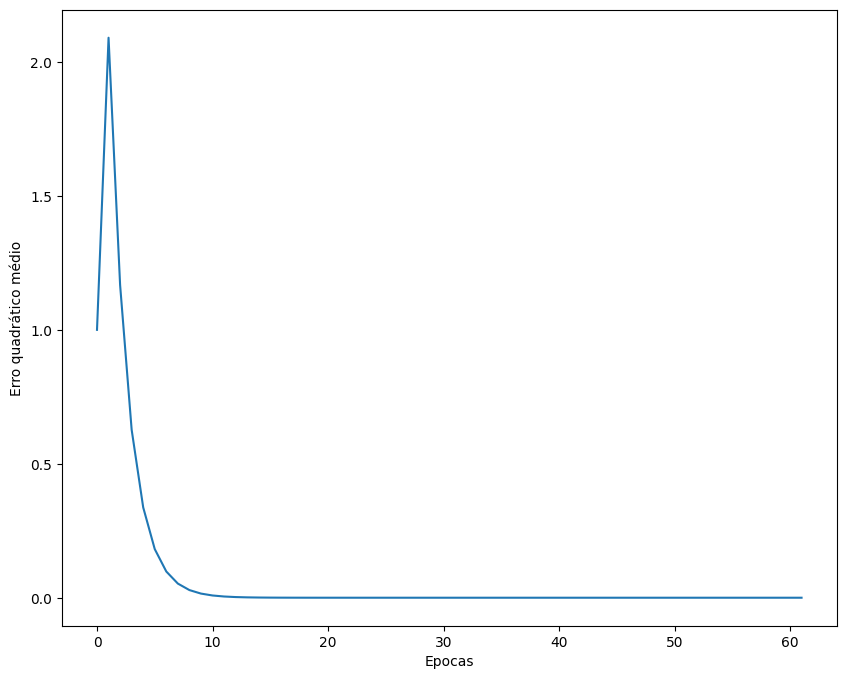

In [9]:
epocas = np.array(list(clf.histerr.keys()))
erro_quadratico_por_epoca = np.array(list(clf.histerr.values()))
plt.figure(figsize=(10,8))
plt.ylabel('Erro quadrático médio')
plt.xlabel('Epocas')
plt.plot(epocas, erro_quadratico_por_epoca)
plt.savefig('Error per epoch.png')



In [10]:
accuracy_score(y_train, clf.predict(x_train)) ,accuracy_score(y_test,y_hat)

(0.87, 0.9)

In [11]:
c1= np.linspace(-3,3,1000)
c2 = (-c1 * clf.pesos[1]/clf.pesos[2]) + clf.pesos[0]

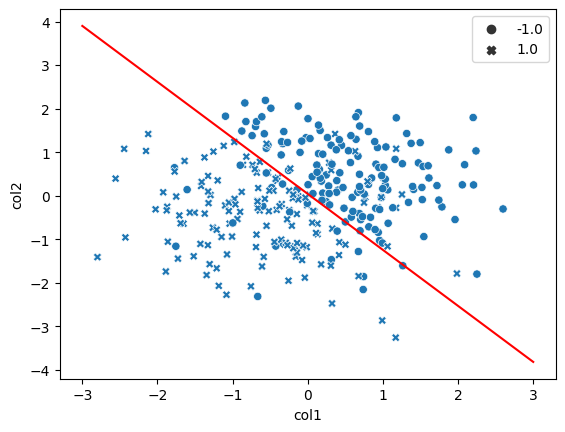

In [12]:
sns.scatterplot(data = train, x='col1',y='col2',style='target')
sns.lineplot(x=c1,y=c2,color='red')
plt.savefig('Best result, acc_test: 0.87 and acc_train: 0.9.png')

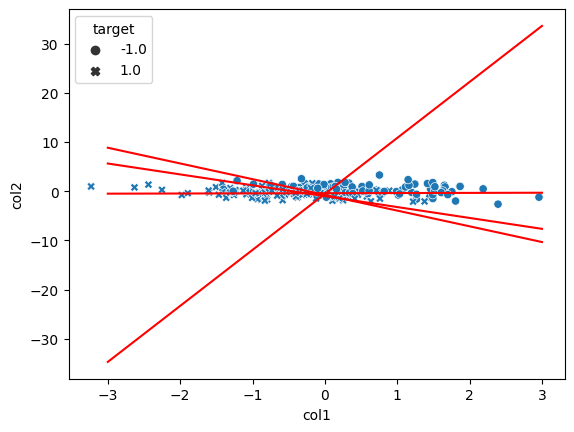

In [14]:
for x in range(4):
    peso = clf.histpeso[f"{x}"]
    c1= np.linspace(-3,3,1000)
    c2 = (-c1 * peso[1]/peso[2]) + peso[0]
    sns.lineplot(x=c1,y=c2,color='red')
sns.scatterplot(data = test, x='col1',y='col2',style='target')
plt.savefig('Training.png')    